# MSIS685 Big Data Analytics - Pandas Review

## Pandas
- Pandas Series
- Pandas DataFrame
- Basic Analysis
- Read and write files (csv, txt, and excel)
- Advanced Pandas for Data Analysis
    - One line function
    - Lambda function
    - Manipulating one DataFrame
        - Map & Apply
        - Groupby
        - Pivot_table
    - Manipulating Multiple DataFrames
        - Concat
        - Merge

## NumPy Basics

In [1]:
import numpy   # import a package so we can call the pre-written functions in the package

In [2]:
a = numpy.array([1, 2, 3])    # numpy.array is a function in the numpy package
print(a)

[1 2 3]


In [3]:
import numpy as np   # we usually assign an alias "np" to numpy when we importing it

In [4]:
a = np.array([1, 2, 3])
print(a)

[1 2 3]


In [5]:
## creating by transfer a list

x1 = [1, 2, 3, 4, 5]
x2 = np.array(x1)

print(type(x1))
print(type(x2))

<class 'list'>
<class 'numpy.ndarray'>


In [6]:
## let's see a 2 dimention array

x1 = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
x2 = np.array(x1)

x2

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [7]:
## the biggest difference between a list and a numpy array is
## we could directly apply numerical and comparison operators into a numpy array
## but we can't do that to a list
print(x1)
x1 + 1   ## x1 is a LIST of numbers, if we try to add 1 to every number in it, this will raise an error

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]


TypeError: can only concatenate list (not "int") to list

In [8]:
x2 + 1   ## x2 is a numpy array transfered from x1, we could directly apply numerical operation to it

array([[ 2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11]])

In [9]:
x2 > 5   ## similar with logical operators

array([[False, False, False, False, False],
       [ True,  True,  True,  True,  True]])

In [10]:
np.mean(x2)    ## we also frequently use numpy to access more advanced math functions

5.5

## Pandas! Pandas! Pandas!

In [11]:
import pandas as pd    # import pandas and assign an alias with "pd"

#### pandas Series

In [12]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])   # pandas will automatically assign index to every item
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [13]:
data.index   # accessing the index

RangeIndex(start=0, stop=4, step=1)

In [14]:
data.values   # accessing the values, from what we can see, the values of a pandas series is essentially a numpy array

array([0.25, 0.5 , 0.75, 1.  ])

In [15]:
data[1]  # you can access the element using its index

0.5

In [16]:
data.to_dict()  # it is interchangeable with a python dictionary

{0: 0.25, 1: 0.5, 2: 0.75, 3: 1.0}

In [17]:
grade = {"Nico": 86, "Cecilia": 90, "Alice":82}
grade = pd.Series(grade)
grade     # the index doesn't have to be numbers, it can be anything

Nico       86
Cecilia    90
Alice      82
dtype: int64

In [18]:
grade['Nico']  # indexing within Pandas Series

86

#### Pandas DataFrame

In [19]:
## The following Dataframe is the combination of three pandas Series
## three Series are converted by three dictionaries with the same key (used as row index)

direction = pd.Series({'California': 'west', 'Texas': 'west',
                  'New York': 'east', 'Florida': 'south',
                  'Illinois': 'south'})
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'direction':direction ,'area':area, 'pop':pop})
data

,direction,area,pop
California,west,423967,38332521
Texas,west,695662,26448193
New York,east,141297,19651127
Florida,south,170312,19552860
Illinois,south,149995,12882135


In [20]:
data.values

array([['west', 423967, 38332521],
       ['west', 695662, 26448193],
       ['east', 141297, 19651127],
       ['south', 170312, 19552860],
       ['south', 149995, 12882135]], dtype=object)

In [21]:
len(data)   # how many rows

5

In [22]:
len(data.columns)   # how many columns

3

In [23]:
data.columns   # access the columns

Index(['direction', 'area', 'pop'], dtype='object')

In [24]:
data.index   # access the index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [25]:
data['area']  # accessing the column, will return a pandas series

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [26]:
data.loc['Texas',:]  # accessing the row

direction        west
area           695662
pop          26448193
Name: Texas, dtype: object

In [27]:
data.loc["California", "direction"]   # accssing individual element in it

'west'

<Axes: >

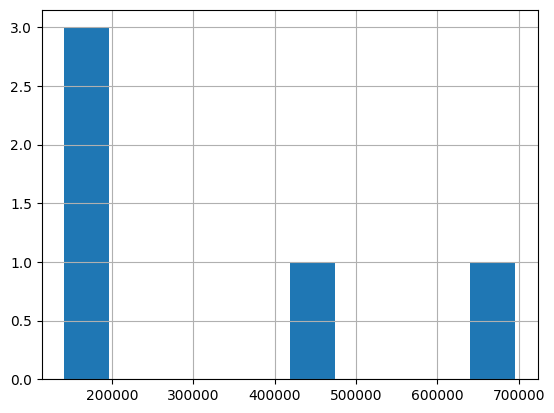

In [28]:
data['area'].hist()  # quickly drawing the distribution of area

In [29]:
data['direction'].value_counts()   # for categorical variable, you may count the unique values in it

direction
west     2
south    2
east     1
Name: count, dtype: int64

<Axes: ylabel='direction'>

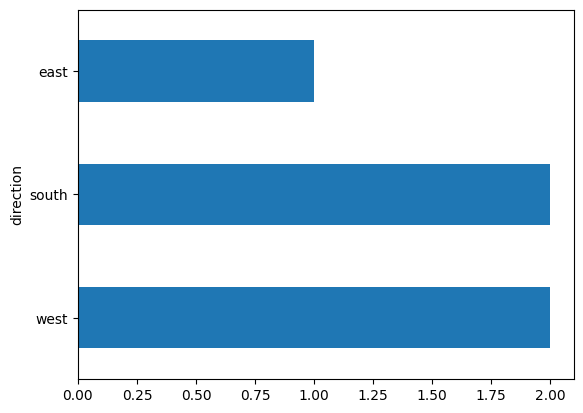

In [30]:
data['direction'].value_counts().plot.barh()  # generate a bar plot showing the distribution of "direction"

In [31]:
np.mean(data['area'])   # do some mathmatical operation to a dataframe

316246.6

In [32]:
data['pop_million'] = np.round(data['pop'] / 1000000, 2)   # do some mathmatical operation to a dataframe and save the result as a new column
data.head()

,direction,area,pop,pop_million
California,west,423967,38332521,38.33
Texas,west,695662,26448193,26.45
New York,east,141297,19651127,19.65
Florida,south,170312,19552860,19.55
Illinois,south,149995,12882135,12.88


In [33]:
data['density'] = data['pop'] / data['area']
data.head()

,direction,area,pop,pop_million,density
California,west,423967,38332521,38.33,90.413926
Texas,west,695662,26448193,26.45,38.018740
New York,east,141297,19651127,19.65,139.076746
Florida,south,170312,19552860,19.55,114.806121
Illinois,south,149995,12882135,12.88,85.883763


In [34]:
## slicing a data frame
data.loc["California":"New York", "area":"pop"]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [35]:
## boolean indexing a dataframe
## suppose I want to find out which states's population density is larger than 100

mask = data['density'] > 100  # we could first create a mask over the dataframe
data[mask]   # then apply the mask to the entire dataframe

,direction,area,pop,pop_million,density
New York,east,141297,19651127,19.65,139.076746
Florida,south,170312,19552860,19.55,114.806121


In [36]:
mask

California    False
Texas         False
New York       True
Florida        True
Illinois      False
Name: density, dtype: bool

In [37]:
data[mask].index

Index(['New York', 'Florida'], dtype='object')

In [38]:
print("The states with population density greater than 100 are:", ", ".join(data[mask].index))

The states with population density greater than 100 are: New York, Florida


## read and write files

In [40]:
data = pd.read_csv("/content/Titanic.csv")  ## read a csv file
data.head()  # return the first 5 rows of a data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
data = pd.read_excel("/content/Titanic.xlsx")  ## read an excel file
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data = pd.read_excel("/content/Titanic.xlsx", sheet_name="Grade")  ## read an excel file, the second sheet
data.head()

,Name,Grade
0,Nico,86
1,Cecilia,90
2,Alice,82


In [47]:
## write files
data.to_csv("/content/Grade.csv", index=None)  # saving the grade into a csv file

In [49]:
data.to_excel("/content/Grade.xlsx")   # saving the grade into an excel file

In [51]:
## write files into your clipboard
#data.to_clipboard()

## Practice

In [54]:
data = pd.read_csv("/content/Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Try to solve the following questions:

1. There are how many passengers in the Titanic?

In [55]:
len(data)

891

2. How many are from the 3rd class [Pclass]?

In [58]:
sum(data['Pclass'] == 3)
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

3. What's the survival rate [Survived]?

In [59]:
sum(data['Survived'] == 1)/len(data)

0.3838383838383838

In [60]:
np.mean(data['Survived'])

0.3838383838383838

4. What's the average fare price [Fare]?

In [61]:
np.mean(data['Fare'])

32.204207968574636

5. How many of female passengers [Sex]?

In [62]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

6. What's the percentage of female passengers? [Sex]

In [63]:
sum(data['Sex'] == 'female')/len(data['Sex'])

0.35241301907968575

## Advanced Pandas for Data Analysis
### Manipulating One DataFrame

### `.map()` to substitute values

We usually use the `map` function to a Pandas Series for substituting each value in it with another value, that may be derived from a function, a dict or a Series.

In [64]:
## suppose we want to transfer female into 0 and male into 1 in a1
a1 = pd.Series(["Female", "Female", "Male", "Male"])

map_dict = {"Female":0, "Male":1}

a2 = a1.map(map_dict)   # map can only be applied to a pandas Series, it will return a pandas Series as its output

print("before substituting: \n",a1)
print("*"*20)
print("after substituting: \n",a2)

before substituting: 
 0    Female
1    Female
2      Male
3      Male
dtype: object
********************
after substituting: 
 0    0
1    0
2    1
3    1
dtype: int64


In [65]:
## similarly, you may apply this to a dataframe by first accessing its row/column then assign a new value
data = {
        'Name':['Martha Cooper', 'Tim Austin', 'Rob Lee', 'Georgia Lincoln'],
        'Gender': ['F', 'M', 'M', 'F'],
        'Maths':[87, 91, 97, 95],
        'Science':[83, 99, 84, 76]
       }
data = pd.DataFrame(data)
data.head()

,Name,Gender,Maths,Science
0,Martha Cooper,F,87,83
1,Tim Austin,M,91,99
2,Rob Lee,M,97,84
3,Georgia Lincoln,F,95,76


In [66]:
data['Gender2'] = data['Gender'].map({"F":0, "M":1})
data

,Name,Gender,Maths,Science,Gender2
0,Martha Cooper,F,87,83,0
1,Tim Austin,M,91,99,1
2,Rob Lee,M,97,84,1
3,Georgia Lincoln,F,95,76,0


- for values that are not found in the dict are converted to `NaN`

In [67]:
## for example, when there is a new observation with gender as "-"
data.loc[4] = ['Lesly Brown', '-', 91, 69, '-']  ## add a new column in which the gender is not provided
data

,Name,Gender,Maths,Science,Gender2
0,Martha Cooper,F,87,83,0
1,Tim Austin,M,91,99,1
2,Rob Lee,M,97,84,1
3,Georgia Lincoln,F,95,76,0
4,Lesly Brown,-,91,69,-


In [68]:
data['Gender2'] = data['Gender'].map({"F":0, "M":1})
data

,Name,Gender,Maths,Science,Gender2
0,Martha Cooper,F,87,83,0.0
1,Tim Austin,M,91,99,1.0
2,Rob Lee,M,97,84,1.0
3,Georgia Lincoln,F,95,76,0.0
4,Lesly Brown,-,91,69,NaN


### Practice

#### Adding students' English grade (saved in a dictionary) into the above table using a `map` function.

In [69]:
english_grade = {"Martha Cooper":90, "Rob Lee":87, "Lesly Brown":67, "Tim Austin":94, "Georgia Lincoln": 84}



# your code here
data ['English'] = data['Name'].map(english_grade)
data


,Name,Gender,Maths,Science,Gender2,English
0,Martha Cooper,F,87,83,0.0,90
1,Tim Austin,M,91,99,1.0,94
2,Rob Lee,M,97,84,1.0,87
3,Georgia Lincoln,F,95,76,0.0,84
4,Lesly Brown,-,91,69,NaN,67


### `apply()` to apply a function

- apply can be apply to both a Pandas DataFrame and a Pandas Series
- when use apply to a Pandas Series, it applies the function on every value in that Series.

In [70]:
## suppose we want to get the first name of each student

get_first_name = lambda x: str(x).split(" ")[0]

# apply takes a function as its input, returns a pandas Series object
data['First Name'] = data['Name'].apply(get_first_name)
data

,Name,Gender,Maths,Science,Gender2,English,First Name
0,Martha Cooper,F,87,83,0.0,90,Martha
1,Tim Austin,M,91,99,1.0,94,Tim
2,Rob Lee,M,97,84,1.0,87,Rob
3,Georgia Lincoln,F,95,76,0.0,84,Georgia
4,Lesly Brown,-,91,69,NaN,67,Lesly


In [71]:
## you may define your function when call the apply function. for example
## let's use lambda directly to get the student's last name

data['Last Name'] = data['Name'].apply(lambda x: str(x).split(" ")[-1])
data

,Name,Gender,Maths,Science,Gender2,English,First Name,Last Name
0,Martha Cooper,F,87,83,0.0,90,Martha,Cooper
1,Tim Austin,M,91,99,1.0,94,Tim,Austin
2,Rob Lee,M,97,84,1.0,87,Rob,Lee
3,Georgia Lincoln,F,95,76,0.0,84,Georgia,Lincoln
4,Lesly Brown,-,91,69,NaN,67,Lesly,Brown


In [72]:
## we often use apply to do some basic data trasnformation, such as take log

data['Log Maths'] = data['Maths'].apply(np.log)
data

,Name,Gender,Maths,Science,Gender2,English,First Name,Last Name,Log Maths
0,Martha Cooper,F,87,83,0.0,90,Martha,Cooper,4.465908
1,Tim Austin,M,91,99,1.0,94,Tim,Austin,4.510860
2,Rob Lee,M,97,84,1.0,87,Rob,Lee,4.574711
3,Georgia Lincoln,F,95,76,0.0,84,Georgia,Lincoln,4.553877
4,Lesly Brown,-,91,69,NaN,67,Lesly,Brown,4.510860


- when apply to a Pandas DataFrame, `apply` has directions.
- it applies the function to either every **columns** (by default, or with `axis=0`) or every **rows** (with `axis=1`)

In [73]:
## for example, we have a dataset contains the sales record of 3 brands from January to May

data2 = pd.DataFrame(np.random.uniform(0,1000, size=15).reshape(5, 3),
                    columns= ["Brand "+c for c in "ABC"],
                    index = pd.date_range("2022-01", periods=5, freq="M"))
data2

,Brand A,Brand B,Brand C
2022-01-31,788.246306,246.383935,472.202702
2022-02-28,148.280156,217.828199,964.163852
2022-03-31,741.533972,931.292078,304.557273
2022-04-30,490.576233,598.907160,669.355520
2022-05-31,47.752387,380.905120,267.707617


In [74]:
## We want to get the total sales of each brand between Jan and May
# by default, apply will apply the function to every column

data2.apply(np.sum)

Brand A    2216.389054
Brand B    2375.316492
Brand C    2677.986964
dtype: float64

In [75]:
# when using axis=1, the function was applied to every row in the dataframe

data2.apply(np.sum, axis = 1)

2022-01-31    1506.832943
2022-02-28    1330.272207
2022-03-31    1977.383323
2022-04-30    1758.838913
2022-05-31     696.365124
Freq: M, dtype: float64

In [76]:
## assume that there are only three brands in the market
## then we may get the market share of each brand using sales of brand x devided by total sales in each month

total_sales = data2.apply(np.sum, axis=1)
market_share = data2.apply(lambda x: x/total_sales)
market_share

,Brand A,Brand B,Brand C
2022-01-31,0.523115,0.163511,0.313374
2022-02-28,0.111466,0.163747,0.724787
2022-03-31,0.375008,0.470972,0.154020
2022-04-30,0.278921,0.340513,0.380567
2022-05-31,0.068574,0.546991,0.384436


<Axes: >

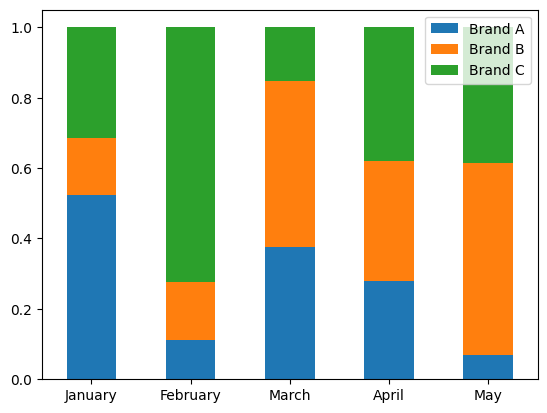

In [77]:
## then we can do some quick visualization
market_share.index = [c.month_name() for c in market_share.index]
market_share.plot.bar(stacked=True, rot=0)

### `groupby()` to separate data into groups

- We usually use groupby to separate the data into groups and do some operations / generate aggregated statistics per group.

In [79]:
data = pd.read_csv("/content/Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
## for example, we want to see the average age of for male and female passengers in Titanic
data.groupby("Sex")['Age'].agg(np.mean)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

- `.agg()` is similar to `.apply()`, but when using after `groupby`, it is more flexible
- for example, `.agg()` gives the flexibility of applying multiple functions at once, or pass a list of function to each column.
- Also, applying different functions at once to different columns of dataframe.

In [81]:
## we may apply multiple functions at once
data.groupby("Sex")['Age'].agg([np.mean, np.max, np.min])

,mean,max,min
Sex,,,
female,27.915709,63.0,0.75
male,30.726645,80.0,0.42


In [82]:
## we may apply multiple functions to multiple columns
data.groupby("Sex")[['Pclass','Age', 'Survived']].agg([np.mean, np.max, np.min])

Pclass                Age              Survived        
            mean max min       mean   max   min      mean max min
Sex                                                              
female  2.159236   3   1  27.915709  63.0  0.75  0.742038   1   0
male    2.389948   3   1  30.726645  80.0  0.42  0.188908   1   0

In [83]:
## if we do not specify which column, it apply the functions to every column possible
data.groupby("Sex").agg(np.mean)

TypeError: Could not convert Cumings, Mrs. John Bradley (Florence Briggs Thayer)Heikkinen, Miss. LainaFutrelle, Mrs. Jacques Heath (Lily May Peel)Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)Nasser, Mrs. Nicholas (Adele Achem)Sandstrom, Miss. Marguerite RutBonnell, Miss. ElizabethVestrom, Miss. Hulda Amanda AdolfinaHewlett, Mrs. (Mary D Kingcome) Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)Masselmani, Mrs. FatimaMcGowan, Miss. Anna "Annie"Palsson, Miss. Torborg DaniraAsplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)O'Dwyer, Miss. Ellen "Nellie"Spencer, Mrs. William Augustus (Marie Eugenie)Glynn, Miss. Mary AgathaVander Planke, Miss. Augusta MariaNicola-Yarred, Miss. JamilaAhlin, Mrs. Johan (Johanna Persdotter Larsson)Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)Laroche, Miss. Simonne Marie Anne AndreeDevaney, Miss. Margaret DeliaO'Driscoll, Miss. BridgetArnold-Franchi, Mrs. Josef (Josefine Franchi)Harper, Mrs. Henry Sleeper (Myna Haxtun)Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)Rugg, Miss. EmilyWest, Miss. Constance MiriumIcard, Miss. AmelieNye, Mrs. (Elizabeth Ramell)Andersson, Miss. Erna AlexandraGoodwin, Miss. Lillian AmyDowdell, Miss. ElizabethMcDermott, Miss. Brigdet DeliaIlett, Miss. BerthaBackstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)Fortune, Miss. Mabel HelenDoling, Mrs. John T (Ada Julia Bone)Petranec, Miss. MatildaSalkjelsvik, Miss. Anna KristineMoran, Miss. BerthaZabour, Miss. HileniJussila, Miss. KatriinaAttalah, Miss. MalakeAndersson, Miss. Ellis Anna MariaWebber, Miss. SusanPeter, Miss. AnnaRobins, Mrs. Alexander A (Grace Charity Laury)Weisz, Mrs. Leopold (Mathilde Francoise Pede)Newsom, Miss. Helen MonypenyBoulos, Mrs. Joseph (Sultana)Nysten, Miss. Anna SofiaHakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)Ford, Miss. Robina Maggie "Ruby"Pears, Mrs. Thomas (Edith Wearne)Gilnagh, Miss. Katherine "Katie"Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)Chibnall, Mrs. (Edith Martha Bowerman)Skoog, Mrs. William (Anna Bernhardina Karlsson)Johnson, Miss. Eleanor IleenIsham, Miss. Ann ElizabethSage, Miss. Constance GladysKink-Heilmann, Miss. Luise GretchenO'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)Pinsky, Mrs. (Rosa)Andersen-Jensen, Miss. Carla Christine NielsineBrown, Mrs. James Joseph (Margaret Tobin)Lurette, Miss. EliseMadigan, Miss. Margaret "Maggie"Yrois, Miss. Henriette ("Mrs Harbeck")Strom, Miss. Telma MatildaCarr, Miss. Helen "Ellen"Cameron, Miss. Clear AnnieNewell, Miss. MadeleineHonkanen, Miss. EliinaBazzani, Miss. AlbinaLefebre, Miss. MathildeHarris, Mrs. Henry Birkhardt (Irene Wallach)Asplund, Miss. Lillian GertrudHarknett, Miss. Alice PhoebeCollyer, Miss. Marjorie "Lottie"Zabour, Miss. ThamineMurphy, Miss. Katherine "Kate"Lindahl, Miss. Agda Thorilda ViktoriaHamalainen, Mrs. William (Anna)Strom, Mrs. Wilhelm (Elna Matilda Persson)Rosblom, Mrs. Viktor (Helena Wilhelmina)Touma, Mrs. Darwis (Hanne Youssef Razi)Thorne, Mrs. Gertrude MaybelleCherry, Miss. GladysWard, Miss. AnnaParrish, Mrs. (Lutie Davis)Henry, Miss. DeliaGraham, Mrs. William Thompson (Edith Junkins)Bissette, Miss. AmeliaMellinger, Mrs. (Elizabeth Anne Maidment)Healy, Miss. Hanora "Nora"Andrews, Miss. Kornelia TheodosiaLindblom, Miss. Augusta CharlottaAbbott, Mrs. Stanton (Rosa Hunt)Connolly, Miss. KateBarber, Miss. Ellen "Nellie"Bishop, Mrs. Dickinson H (Helen Walton)Haas, Miss. AloisiaAllison, Miss. Helen LoraineBaxter, Mrs. James (Helene DeLaudeniere Chaput)Kelly, Miss. Anna Katherine "Annie Kate"Keane, Miss. Nora AFleming, Miss. MargaretPenasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)Francatelli, Miss. Laura MabelHays, Miss. Margaret BechsteinRyerson, Miss. Emily BorieLahtinen, Mrs. William (Anna Sylfven)Nilsson, Miss. Helmina JosefinaKantor, Mrs. Sinai (Miriam Sternin)Wick, Miss. Mary NatalieSpedden, Mrs. Frederic Oakley (Margaretta Corning Stone)Slayter, Miss. Hilda MaryCaldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)Young, Miss. Marie GriceBall, Mrs. (Ada E Hall)Goldsmith, Mrs. Frank John (Emily Alice Brown)Hippach, Miss. Jean GertrudeMcCoy, Miss. AgnesFrauenthal, Mrs. Henry William (Clara Heinsheimer)Burns, Miss. Elizabeth MargaretFortune, Miss. Alice ElizabethBrown, Miss. Amelia "Mildred"Smith, Miss. Marion ElsieDavison, Mrs. Thomas Henry (Mary E Finck)Bowerman, Miss. Elsie EdithFunk, Miss. Annie ClemmerMcGovern, Miss. MaryMockler, Miss. Helen Mary "Ellie"Barbara, Mrs. (Catherine David)Warren, Mrs. Frank Manley (Anna Sophia Atkinson)Moussa, Mrs. (Mantoura Boulos)Jermyn, Miss. AnnieAubart, Mme. Leontine PaulinePalsson, Miss. Stina ViolaMeyer, Mrs. Edgar Joseph (Leila Saks)Landergren, Miss. Aurora AdeliaBidois, Miss. RosalieNakid, Miss. Maria ("Mary")Holverson, Mrs. Alexander Oskar (Mary Aline Towner)Buss, Miss. KateLehmann, Miss. BerthaNewell, Miss. MarjorieSandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)Olsson, Miss. ElinaTrout, Mrs. William H (Jessie L)Jussila, Miss. Mari AinaOreskovic, Miss. MarijaLefebre, Miss. IdaMinahan, Miss. Daisy EMeek, Mrs. Thomas (Annie Louise Rowley)Drew, Mrs. James Vivian (Lulu Thorne Christian)Silven, Miss. Lyyli KaroliinaVan Impe, Miss. CatharinaDanbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)Clarke, Mrs. Charles V (Ada Maria Winfield)Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")Thorneycroft, Mrs. Percival (Florence Kate White)Louch, Mrs. Charles Alexander (Alice Adelaide Slow)Carter, Miss. Lucile PolkFord, Miss. Doolina Margaret "Daisy"Richards, Mrs. Sidney (Emily Hocking)Hart, Mrs. Benjamin (Esther Ada Bloomfield)Reynaldo, Ms. EncarnacionMellinger, Miss. Madeleine VioletBaclini, Miss. Marie CatherineKenyon, Mrs. Frederick R (Marion)Toomey, Miss. EllenBaclini, Miss. Helene BarbaraWest, Mrs. Edwy Arthur (Ada Mary Worth)Jerwan, Mrs. Amin S (Marie Marthe Thuillard)Strandberg, Miss. Ida SofiaHirvonen, Miss. Hildur ETurkula, Mrs. (Hedwig)Lefebre, Miss. JeannieHoyt, Mrs. Frederick Maxfield (Jane Anne Forby)Eustis, Miss. Elizabeth MusseyAllison, Mrs. Hudson J C (Bessie Waldo Daniels)Canavan, Miss. MaryO'Sullivan, Miss. Bridget MaryLaitinen, Miss. Kristina SofiaMaioni, Miss. RobertaQuick, Mrs. Frederick Charles (Jane Richards)Rothschild, Mrs. Martin (Elizabeth L. Barrett)Lemore, Mrs. (Amelia Milley)Angle, Mrs. William A (Florence "Mary" Agnes Hughes)Perreault, Miss. AnneHippach, Mrs. Louis Albert (Ida Sophia Fischer)Ridsdale, Miss. LucyQuick, Miss. Phyllis MayPeter, Mrs. Catherine (Catherine Rizk)Cacic, Miss. MarijaHart, Miss. Eva MiriamLeRoy, Miss. BerthaFrolicher, Miss. Hedwig MargarithaCrosby, Miss. Harriet RAndersson, Miss. Ingeborg ConstanziaAndersson, Miss. Sigrid ElisabethBeane, Mrs. Edward (Ethel Clarke)Ohman, Miss. VelinDuff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")Taussig, Mrs. Emil (Tillie Mandelbaum)de Messemaeker, Mrs. Guillaume Joseph (Emma)Meanwell, Miss. (Marion Ogden)Palsson, Mrs. Nils (Alma Cornelia Berglund)Appleton, Mrs. Edward Dale (Charlotte Lamson)Kelly, Miss. MaryGarside, Miss. EthelSilvey, Mrs. William Baird (Alice Munger)Caram, Mrs. Joseph (Maria Elias)Christy, Miss. Julie RachelThayer, Mrs. John Borland (Marian Longstreth Morris)Taussig, Miss. RuthStephenson, Mrs. Walter Bertram (Martha Eustis)Bourke, Miss. MaryLeitch, Miss. Jessie WillsJacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)Shutes, Miss. Elizabeth WAndersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)Murphy, Miss. Margaret JaneHerman, Miss. AliceLobb, Mrs. William Arthur (Cordelia K Stanlick)Becker, Miss. Marion LouiseLongley, Miss. Gretchen FiskeSkoog, Miss. MabelDavis, Miss. MaryPanula, Mrs. Juha (Maria Emilia Ojala)Sagesser, Mlle. EmmaSkoog, Miss. Margit ElizabethBaclini, Miss. EugenieStanley, Miss. Amy Zillah ElsieDoling, Miss. ElsieO'Leary, Miss. Hanora "Norah"Hegarty, Miss. Hanora "Nora"Bourke, Mrs. John (Catherine)Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)Turja, Miss. Anna SofiaGoodwin, Mrs. Frederick (Augusta Tyler)Peters, Miss. KatieMadill, Miss. Georgette AlexandraKarun, Miss. MancaMullens, Miss. Katherine "Katie"Astor, Mrs. John Jacob (Madeleine Talmadge Force)Barbara, Miss. SaiideKelly, Mrs. Florence "Fannie"Cleaver, Miss. AliceMayne, Mlle. Berthe Antonine ("Mrs de Villiers")Endres, Miss. Caroline LouiseTroutt, Miss. Edwina Celia "Winnie"Harper, Miss. Annie Jessie "Nina"Renouf, Mrs. Peter Henry (Lillian Jefferys)Mannion, Miss. MargarethIlmakangas, Miss. Pieta SofiaAllen, Miss. Elisabeth WaltonFord, Mrs. Edward (Margaret Ann Watson)Ryerson, Miss. Susan Parker "Suzette"Sinkkonen, Miss. AnnaWells, Miss. JoanHerman, Mrs. Samuel (Jane Laver)Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)Carter, Mrs. William Ernest (Lucile Polk)Hogeboom, Mrs. John C (Anna Andrews)Mangan, Miss. MaryMack, Mrs. (Mary)Hocking, Mrs. Elizabeth (Eliza Needs)Emanuel, Miss. Virginia EthelRobert, Mrs. Edward Scott (Elisabeth Walton McMillan)Ayoub, Miss. BanouraDick, Mrs. Albert Adrian (Vera Gillespie)Sjoblom, Miss. Anna SofiaSage, Miss. Stella AnnaLeader, Dr. Alice (Farnham)Osman, Mrs. MaraVan Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)Collyer, Mrs. Harvey (Charlotte Annie Tate)Pettersson, Miss. Ellen NataliaChambers, Mrs. Norman Campbell (Bertha Griggs)Andersson, Miss. Ebba Iris AlfridaHeininen, Miss. Wendla MariaHays, Mrs. Charles Melville (Clara Jennings Gregg)Moor, Mrs. (Beila)Stone, Mrs. George Nelson (Martha Evelyn)Yasbeck, Mrs. Antoni (Selini Alexander)Compton, Miss. Sara RebeccaSerepeca, Miss. AugustaGoldenberg, Mrs. Samuel L (Edwiga Grabowska)Boulos, Miss. NourelainLines, Miss. Mary ConoverCarter, Mrs. Ernest Courtenay (Lilian Hughes)Aks, Mrs. Sam (Leah Rosen)Wick, Mrs. George Dennick (Mary Hitchcock)Baclini, Mrs. Solomon (Latifa Qurban)Swift, Mrs. Frederick Joel (Margaret Welles Barron)Sage, Miss. Dorothy Edith "Dolly"Bystrom, Mrs. (Karolina)Duran y More, Miss. AsuncionBeckwith, Mrs. Richard Leonard (Sallie Monypeny)Abelson, Mrs. Samuel (Hannah Wizosky)Najib, Miss. Adele Kiamie "Jane"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)Shelley, Mrs. William (Imanita Parrish Hall)Dahlberg, Miss. Gerda UlrikaRice, Mrs. William (Margaret Norton)Graham, Miss. Margaret EdithJohnston, Miss. Catherine Helen "Carrie" to numeric

In [84]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
## multiple index, for example, we want to compare the survival rate of female and male passengers when taking into account their cabin class
## we may do that by groupby both sex and pclass

data.groupby(["Sex", "Pclass"])['Survived'].agg(np.mean)

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [86]:
## other operations are the same for multiple indexing

data2 = data.groupby(["Sex", "Pclass"])[['Survived', 'Fare', 'Age']].agg(np.mean)
data2

Survived        Fare        Age
Sex    Pclass                                 
female 1       0.968085  106.125798  34.611765
       2       0.921053   21.970121  28.722973
       3       0.500000   16.118810  21.750000
male   1       0.368852   67.226127  41.281386
       2       0.157407   19.741782  30.740707
       3       0.135447   12.661633  26.507589

- Grouping by multiple categories will result in a MultiIndex DataFrame. However, it is not practical to have Sex and Pclass columns as the index when we need to perform some data analysis.
- We can call the `reset_index()` method on the DataFrame to reset them and use the default 0-based integer index instead.

In [87]:
data2 = data2.reset_index()
data2

,Sex,Pclass,Survived,Fare,Age
0,female,1,0.968085,106.125798,34.611765
1,female,2,0.921053,21.970121,28.722973
2,female,3,0.500000,16.118810,21.750000
3,male,1,0.368852,67.226127,41.281386
4,male,2,0.157407,19.741782,30.740707
5,male,3,0.135447,12.661633,26.507589


## Practice

#### try to get the average, max, min price for Stock A and Stock B in the first three months of 2022.

In [88]:
# let's check on a smaller dataset
stocks1 = pd.DataFrame({"Stock": ['A']*5,
                        "Price": np.random.normal(loc = 10, scale=1, size=5),
                        "Time" : pd.date_range("2022-01", periods=5, freq="M")})
stocks2 = pd.DataFrame({"Stock": ['B']*5,
                        "Price": np.random.normal(loc = 100, scale=10, size=5),
                        "Time" : pd.date_range("2022-01", periods=5, freq="M")})
stocks = pd.concat([stocks1, stocks2])
stocks

,Stock,Price,Time
0,A,8.831096,2022-01-31
1,A,8.120338,2022-02-28
2,A,8.557663,2022-03-31
3,A,10.357055,2022-04-30
4,A,8.387591,2022-05-31
0,B,94.557464,2022-01-31
1,B,95.494514,2022-02-28
2,B,103.213751,2022-03-31
3,B,112.785293,2022-04-30
4,B,96.649834,2022-05-31


In [90]:
## your code here
mask = stocks['Time'] < pd.Timestamp("2022-04-01")
stocks[mask].groupby('Stock')['Price'].agg([np.mean,np.max,np.min])


,mean,max,min
Stock,,,
A,10.075259,10.732367,9.694496
B,99.079680,100.561104,97.329072


## Manipulating Multiple DataFrames

### `concat()` to concatenate multiple tables

- We usually use `concat` to concatenate multiple tables vertically (default, or with `axis=0`) or horizontally (`axis=1`).

In [91]:
stock1 = pd.DataFrame({"Stock": ['A']*5,
                        "Price": np.random.normal(loc = 10, scale=1, size=5),
                        "Time" : pd.date_range("2022-01", periods=5, freq="M")})
stock1

,Stock,Price,Time
0,A,9.531385,2022-01-31
1,A,10.344001,2022-02-28
2,A,10.583364,2022-03-31
3,A,10.033888,2022-04-30
4,A,10.929002,2022-05-31


In [92]:
stock2 = pd.DataFrame({"Stock": ['B']*5,
                        "Price": np.random.normal(loc = 100, scale=10, size=5),
                        "Time" : pd.date_range("2022-01", periods=5, freq="M")})
stock2

,Stock,Price,Time
0,B,105.849538,2022-01-31
1,B,106.920294,2022-02-28
2,B,108.539781,2022-03-31
3,B,99.275146,2022-04-30
4,B,84.397577,2022-05-31


In [93]:
## concat vertically
stocks = pd.concat([stock1, stock2])
stocks

,Stock,Price,Time
0,A,9.531385,2022-01-31
1,A,10.344001,2022-02-28
2,A,10.583364,2022-03-31
3,A,10.033888,2022-04-30
4,A,10.929002,2022-05-31
0,B,105.849538,2022-01-31
1,B,106.920294,2022-02-28
2,B,108.539781,2022-03-31
3,B,99.275146,2022-04-30
4,B,84.397577,2022-05-31


In [94]:
## concat horizontally (not frequently use)
stocks2 = pd.concat([stock1, stock2], axis=1)   # mutiple columns with the same column name, which is confusing
stocks2

,Stock,Price,Time,Stock,Price,Time
0,A,9.531385,2022-01-31,B,105.849538,2022-01-31
1,A,10.344001,2022-02-28,B,106.920294,2022-02-28
2,A,10.583364,2022-03-31,B,108.539781,2022-03-31
3,A,10.033888,2022-04-30,B,99.275146,2022-04-30
4,A,10.929002,2022-05-31,B,84.397577,2022-05-31


- Technically, `concat()` can take two tables with different shapes, but that will very easily lead to all kinds of unintended mistakes.
- So, in practice, we usually use `concat()` to concat tables with the same shape (with the same columns if concat vertically; with the same number of rows if concat horizontally)

### `merge()` to merge/join two tables by some keys

- `merge()` is used when we want to combine two tables on their common columns
- It is very similar but more powerful to the `VLOOKUP` function in Excel or `JOIN` operation in SQL.

In [95]:
left = pd.DataFrame([['Frank', 92, 94], ['Alice', 96, 90], ['Nico', 90, 93]], columns=['Name', 'Maths', 'Science'])
right = pd.DataFrame([['Frank', 83, 80], ['Alice', 92, 96], ['Cecilia', 90, 98], ['Edan', 92, 87]], columns=['Name', 'English', 'Art'])

In [97]:
left

,Name,Maths,Science
0,Frank,92,94
1,Alice,96,90
2,Nico,90,93


In [96]:
right

,Name,English,Art
0,Frank,83,80
1,Alice,92,96
2,Cecilia,90,98
3,Edan,92,87


In [98]:
pd.merge(left, right, on="Name")  # by default, how="inner" meaning take the intersection of names in the left and right tables

,Name,Maths,Science,English,Art
0,Frank,92,94,83,80
1,Alice,96,90,92,96


In [99]:
pd.merge(left, right, on="Name", how="inner")   # exactly the same as the above table

,Name,Maths,Science,English,Art
0,Frank,92,94,83,80
1,Alice,96,90,92,96


In [100]:
pd.merge(left, right, on="Name", how="left")   # keep all the names in the left table

,Name,Maths,Science,English,Art
0,Frank,92,94,83.0,80.0
1,Alice,96,90,92.0,96.0
2,Nico,90,93,NaN,NaN


In [101]:
pd.merge(left, right, on="Name", how="right")     # keep all the names in the right table

,Name,Maths,Science,English,Art
0,Frank,92.0,94.0,83,80
1,Alice,96.0,90.0,92,96
2,Cecilia,NaN,NaN,90,98
3,Edan,NaN,NaN,92,87


In [102]:
pd.merge(left, right, on="Name", how="outer")      # keep the all the names in both left and right tables (union)

,Name,Maths,Science,English,Art
0,Frank,92.0,94.0,83.0,80.0
1,Alice,96.0,90.0,92.0,96.0
2,Nico,90.0,93.0,NaN,NaN
3,Cecilia,NaN,NaN,90.0,98.0
4,Edan,NaN,NaN,92.0,87.0


- `merge()` essentially perform [Database-style Join](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging) (similar to `join` in SQL).
- Check here fore a nice video talks about similarity and differences between `merge` and `VLOOPUP`
- https://www.youtube.com/watch?v=AHS925L8JVk

## Practice: the Tips dataset

- Try to solve the following questions

### 1. load the "tips_weekend.csv" and "tips_workday.csv" datasets into your python environment and concat them together to form a total dataset.

- Since the two tables have the same shape, `pd.concat()` is the correct way to do so.

In [103]:
## your code here
weekend = pd.read_csv("tips_weekend.csv")
workday = pd.read_csv("tips_workday.csv")
tips = pd.concat([weekend, workday])
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
76,15.98,3.00,Female,No,Fri,Lunch,3
77,13.42,1.58,Male,Yes,Fri,Lunch,2
78,16.27,2.50,Female,Yes,Fri,Lunch,2
79,10.09,2.00,Female,Yes,Fri,Lunch,2


### 2. Do Female servers earn more tip or Male servers earn more tip?
- You may consider using `groupby()` and `agg()` to get the statistics.

In [104]:
## your code here
tips.groupby(["day","sex"])['tip'].agg(np.mean)

day   sex   
Fri   Female    2.781111
      Male      2.693000
Sat   Female    2.801786
      Male      3.083898
Sun   Female    3.367222
      Male      3.220345
Thur  Female    2.575625
      Male      2.980333
Name: tip, dtype: float64

### 3. Does the Day (Workday/Weekend) matter when control for the Sex of the food servers?

In [105]:
## your code here
tips['day'].value_counts()


day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [106]:
day_category_map = {"Sat":"Weekend","Sun":"Weekend","Thur":"Workday","Fri":"Workday"}
tips['workday_weekend'] = tips['day'].map(day_category_map)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,workday_weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,Weekend
1,10.34,1.66,Male,No,Sun,Dinner,3,Weekend
2,21.01,3.50,Male,No,Sun,Dinner,3,Weekend
3,23.68,3.31,Male,No,Sun,Dinner,2,Weekend
4,24.59,3.61,Female,No,Sun,Dinner,4,Weekend


In [107]:
tips.groupby(['workday_weekend', "sex"])['tip'].agg(np.mean)

workday_weekend  sex   
Weekend          Female    3.023043
                 Male      3.151538
Workday          Female    2.620732
                 Male      2.908500
Name: tip, dtype: float64

### 4. Generate a new column called "tip_ratio" and re-do the above analysis

$$Tip Ratio = \frac{Tip}{Total Bill}$$

In [108]:
## your code here
## your code here
tips['tip_ratio'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,workday_weekend,tip_ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,Weekend,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,Weekend,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,Weekend,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,Weekend,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,Weekend,0.146808


In [109]:
tips.groupby("sex")['tip_ratio'].agg(np.mean)

sex
Female    0.166491
Male      0.157651
Name: tip_ratio, dtype: float64

In [110]:
tips.groupby(['workday_weekend', "sex"])['tip_ratio'].agg(np.mean)

workday_weekend  sex   
Weekend          Female    0.166291
                 Male      0.156914
Workday          Female    0.166714
                 Male      0.159804
Name: tip_ratio, dtype: float64